In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
data = pd.read_csv('../performance_measurements.csv')
data.loc['mean'] = data.mean(axis=0).round().astype(int)
# " (ms)"-Endung aus den Spaltennamen entfernen
data.columns = [col.replace(" (ms)", "") for col in data.columns]

# Sinus-Messerte werden temporär entfernt
# TODO: Das hier entfernen
# for col in data:
#     if col.endswith('sinus'):
#         data.drop(col, axis=1, inplace=True)

data

,standard_sinus,fourThreads_linear,twoThreads_constant,standard_linear,twoThreads_linear,fourThreads_constant,standard_constant,fiveThreads_sinus,threeThreads_constant,twoThreads_sinus,threeThreads_linear,fiveThreads_linear,fourThreads_sinus,fiveThreads_constant,threeThreads_sinus
0,2607,957,1732,2337,1688,1035,2251,1316,1241,2210,1483,1075,1484,1042,1534
1,2603,962,1766,2340,1691,976,2186,1256,1259,2217,1606,841,1439,878,1528
2,2567,941,1743,2315,1667,998,2229,1439,1278,2187,1347,816,1491,850,1512
3,2528,946,1895,2263,1666,947,2210,1307,1237,2150,1381,786,1386,859,1619
4,2522,928,1836,2358,1732,1063,2177,1369,1284,2116,1484,775,1459,879,1610
5,2545,923,1851,2360,1711,1017,2178,1394,1296,2109,1378,767,1413,848,1618
6,2642,964,1854,2323,1682,1034,2304,1293,1299,2090,1377,826,1409,794,1607
7,2545,963,1850,2326,1693,1155,2619,1336,1348,2093,1485,777,1392,766,1576
8,2546,996,1811,2285,1667,969,2648,1330,1336,2053,1326,793,1462,817,1632
9,2529,946,1864,2283,1687,1050,2556,1423,1335,2092,1413,794,1395,781,1578


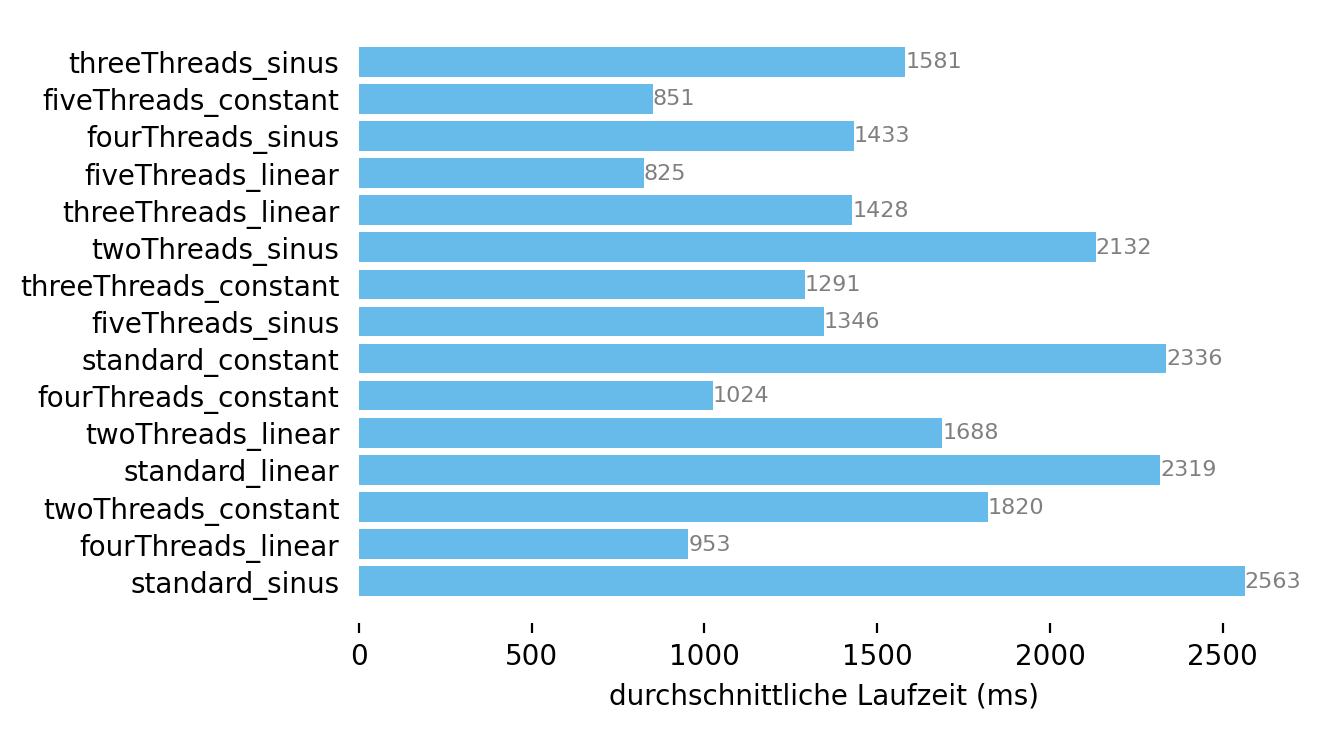

In [15]:
from matplotlib.text import Text

fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.barh(data.columns, data.loc['mean'], color='#56B4E9', alpha=0.9)
ax.set(xlabel='durchschnittliche Laufzeit (ms)')
plt.tick_params(left = False)

# Die Ausführungszeit an den Balken angezeigen
for i, rect in enumerate(bar_plot):
    text: Text = plt.text(i, data.columns[i], data.loc['mean'][i], verticalalignment='center', horizontalalignment='left',alpha=0.5, fontsize=8)
    text.set_x(rect.get_width())
    

for spine in ax.spines.values():
    spine.set_visible(False)

In [17]:
fig.savefig('measurements.pdf', dpi=300, bbox_inches='tight', pad_inches=0, format='pdf')